In [5]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn import metrics
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from lightgbm import LGBMRegressor
from lightgbm import plot_importance
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from utils import preprocess

In [6]:
# reload external python modules; automatically
%load_ext autoreload
%autoreload 2

In [7]:
# data source
train_data_file = './processed_data/processed_train.csv'
test_data_file = './processed_data/processed_test.csv'

# 1. Linear Model

In [ ]:
df_train = pd.read_csv(train_data_file)
df_test = pd.read_csv(test_data_file)

In [5]:
df_train_8, df_test_2 = train_test_split(df_train, test_size = 0.2, random_state = 42)

## 1.1. linear regression model

### train linear regression model

In [6]:
all_X_att_train = df_train_8.columns.to_list()
all_X_att_train.remove('price')
X_train, X_test, y_train, y_test = df_train_8[all_X_att_train], df_test_2[all_X_att_train], df_train_8['price'], df_test_2['price']

regressor = LinearRegression()
regressor.fit(
    X=X_train,
    y=y_train,
)
y_hat_train = regressor.predict(X_train)
y_hat_test = regressor.predict(X_test)

### evaluate linear regression model

In [7]:
# calculate MAE, MSE, RMSE for train_data
print('train_MAE: ', metrics.mean_absolute_error(y_hat_train, y_train))
print('train_MSE: ', metrics.mean_squared_error(y_hat_train, y_train))
print('train_RMSE: ', np.sqrt(metrics.mean_squared_error(y_hat_train, y_train)))
print('score_train: ', regressor.score(X_train, y_train))

# calculate MAE, MSE, RMSE for test_data
print('test_MAE: ', metrics.mean_absolute_error(y_hat_test, y_test))
print('test_MSE: ', metrics.mean_squared_error(y_hat_test, y_test))
print('test_RMSE: ', np.sqrt(metrics.mean_squared_error(y_hat_test, y_test)))
print('score_test: ', regressor.score(X_test, y_test))

train_MAE:  991702.4406246099
train_MSE:  5829494987978.709
train_RMSE:  2414434.713960746
score_train:  0.7453176296046737
test_MAE:  1051036.320611237
test_MSE:  8946766102916.53
test_RMSE:  2991114.5252090446
score_test:  0.6622919390693183


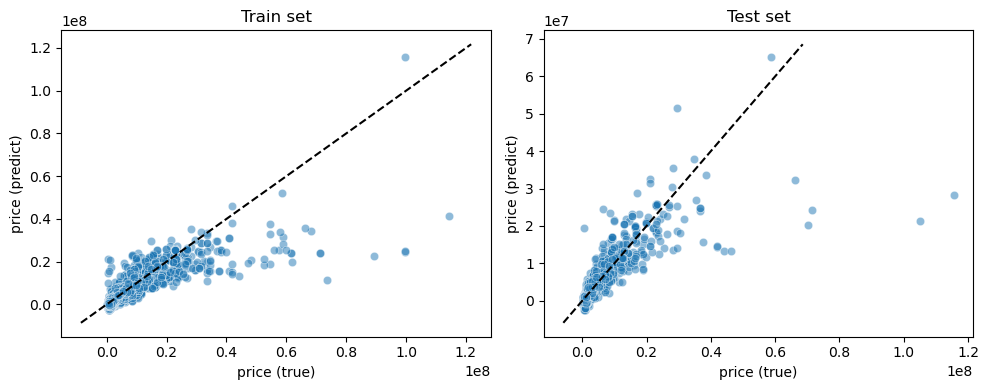

In [8]:
outputs = 'price'
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(
    x=y_train.ravel(),
    y=y_hat_train,
    ax=ax[0],
    alpha=0.5,
)

sns.scatterplot(
    x=y_test.ravel(),
    y=y_hat_test,
    ax=ax[1],
    alpha=0.5,
)

for a in ax:
    a.set_xlabel(f'{outputs} (true)')
    a.set_ylabel(f'{outputs} (predict)')
    a.plot(a.get_ylim(), a.get_ylim(), ls='--', c='k')


    
ax[0].set_title('Train set')
ax[1].set_title('Test set')

fig.tight_layout()

## 1.2. kernel ridge regression model

### train kernel ridge regression model

In [9]:
kernel_model = KernelRidge(alpha=1.0, kernel='linear')
kernel_model.fit(X_train, y_train)
y_hat_train_linear = kernel_model.predict(X_train)
y_hat_test_linear = kernel_model.predict(X_test)

### evaluate kernel ridge regression model

In [10]:
# calculate MAE, MSE, RMSE for train_data
print('train_MAE: ', metrics.mean_absolute_error(y_hat_train_linear, y_train))
print('train_MSE: ', metrics.mean_squared_error(y_hat_train_linear, y_train))
print('train_RMSE: ', np.sqrt(metrics.mean_squared_error(y_hat_train_linear, y_train)))
print('score_train: ', regressor.score(X_train, y_train))

# calculate MAE, MSE, RMSE for test_data
print('test_MAE: ', metrics.mean_absolute_error(y_hat_test_linear, y_test))
print('test_MSE: ', metrics.mean_squared_error(y_hat_test_linear, y_test))
print('test_RMSE: ', np.sqrt(metrics.mean_squared_error(y_hat_test_linear, y_test)))
print('score_test: ', regressor.score(X_test, y_test))

train_MAE:  989244.6039735766
train_MSE:  5836904164212.906
train_RMSE:  2415968.576826467
score_train:  0.7453176296046737
test_MAE:  1047415.7933515257
test_MSE:  8959109599353.037
test_RMSE:  2993177.1747347396
score_test:  0.6622919390693183


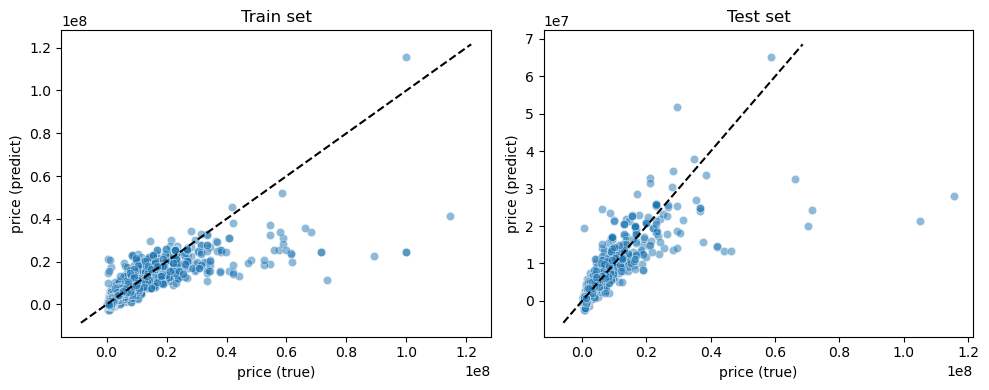

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(
    x=y_train.ravel(),
    y=y_hat_train_linear,
    ax=ax[0],
    alpha=0.5,
)

sns.scatterplot(
    x=y_test.ravel(),
    y=y_hat_test_linear,
    ax=ax[1],
    alpha=0.5,
)

for a in ax:
    a.set_xlabel(f'{outputs} (true)')
    a.set_ylabel(f'{outputs} (predict)')
    a.plot(a.get_ylim(), a.get_ylim(), ls='--', c='k')

ax[0].set_title('Train set')
ax[1].set_title('Test set')

fig.tight_layout()

## 1.3. polynomial kernel regression model

### train polynomial kernel regression model

In [12]:
kernel_model = KernelRidge(alpha=1.0, kernel='polynomial', degree=3)
kernel_model.fit(X_train, y_train)
y_hat_train_polynomial = kernel_model.predict(X_train)
y_hat_test_polynomial = kernel_model.predict(X_test)

### evaluate polynomial kernel regression model

In [13]:
# calculate MAE, MSE, RMSE for train_data
print('train_MAE: ', metrics.mean_absolute_error(y_hat_train_polynomial, y_train))
print('train_MSE: ', metrics.mean_squared_error(y_hat_train_polynomial, y_train))
print('train_RMSE: ', np.sqrt(metrics.mean_squared_error(y_hat_train_polynomial, y_train)))
print('score_train: ', regressor.score(X_train, y_train))

# calculate MAE, MSE, RMSE for test_data
print('test_MAE: ', metrics.mean_absolute_error(y_hat_test_polynomial, y_test))
print('test_MSE: ', metrics.mean_squared_error(y_hat_test_polynomial, y_test))
print('test_RMSE: ', np.sqrt(metrics.mean_squared_error(y_hat_test_polynomial, y_test)))
print('score_test: ', regressor.score(X_test, y_test))

train_MAE:  542182.4181483068
train_MSE:  1595742963726.9475
train_RMSE:  1263227.2019422902
score_train:  0.7453176296046737
test_MAE:  784876.5506077897
test_MSE:  34838933913671.21
test_RMSE:  5902451.51726562
score_test:  0.6622919390693183


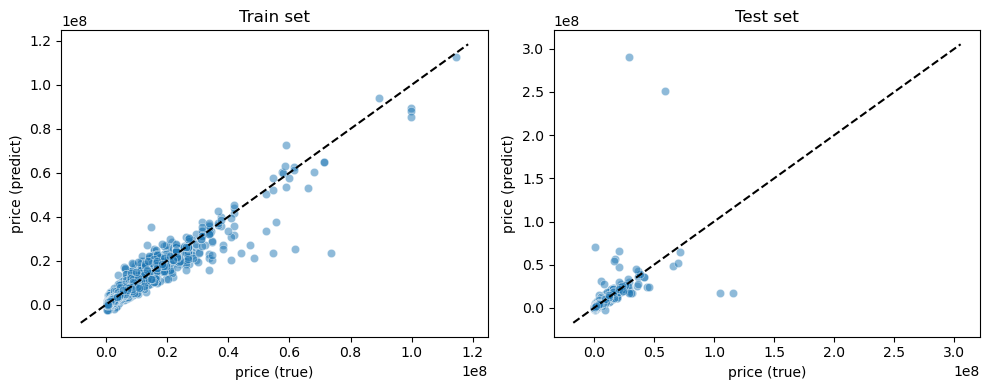

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(
    x=y_train.ravel(),
    y=y_hat_train_polynomial,
    ax=ax[0],
    alpha=0.5,
)

sns.scatterplot(
    x=y_test.ravel(),
    y=y_hat_test_polynomial,
    ax=ax[1],
    alpha=0.5,
)

for a in ax:
    a.set_xlabel(f'{outputs} (true)')
    a.set_ylabel(f'{outputs} (predict)')
    a.plot(a.get_ylim(), a.get_ylim(), ls='--', c='k')


    
ax[0].set_title('Train set')
ax[1].set_title('Test set')

fig.tight_layout()

## 1.4. RBF kernel regression model 

### train RBF kernel regression model

In [15]:
kernel_model = KernelRidge(alpha=1.0, kernel='rbf', gamma=0.08)
kernel_model.fit(X_train, y_train)
y_hat_train_rbf = kernel_model.predict(X_train)
y_hat_test_rbf = kernel_model.predict(X_test)

### evaluate RBF kernel regression model

In [16]:
# calculate MAE, MSE, RMSE for train_data
print('train_MAE: ', metrics.mean_absolute_error(y_hat_train_rbf, y_train))
print('train_MSE: ', metrics.mean_squared_error(y_hat_train_rbf, y_train))
print('train_RMSE: ', np.sqrt(metrics.mean_squared_error(y_hat_train_rbf, y_train)))
print('score_train: ', regressor.score(X_train, y_train))

# calculate MAE, MSE, RMSE for test_data
print('test_MAE: ', metrics.mean_absolute_error(y_hat_test_rbf, y_test))
print('test_MSE: ', metrics.mean_squared_error(y_hat_test_rbf, y_test))
print('test_RMSE: ', np.sqrt(metrics.mean_squared_error(y_hat_test_rbf, y_test)))
print('score_test: ', regressor.score(X_test, y_test))

train_MAE:  801686.0214035263
train_MSE:  4496472804334.881
train_RMSE:  2120488.8125936626
score_train:  0.7453176296046737
test_MAE:  1467148.1235339015
test_MSE:  20768610362366.656
test_RMSE:  4557259.084402231
score_test:  0.6622919390693183


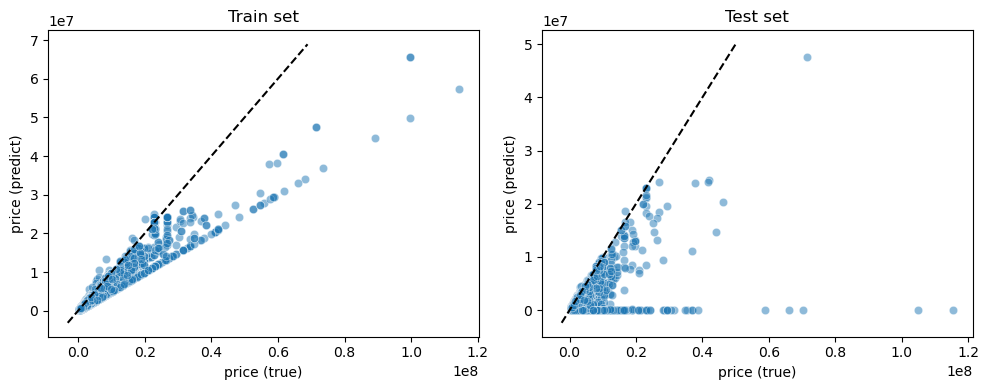

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(
    x=y_train.ravel(),
    y=y_hat_train_rbf,
    ax=ax[0],
    alpha=0.5,
)

sns.scatterplot(
    x=y_test.ravel(),
    y=y_hat_test_rbf,
    ax=ax[1],
    alpha=0.5,
)

for a in ax:
    a.set_xlabel(f'{outputs} (true)')
    a.set_ylabel(f'{outputs} (predict)')
    a.plot(a.get_ylim(), a.get_ylim(), ls='--', c='k')

ax[0].set_title('Train set')
ax[1].set_title('Test set')

fig.tight_layout()

## 1.5. standardized RBF kernel regression model

### standardize RBF attributes

In [18]:
normalized_data = preprocessing.StandardScaler()
train_rbf = pd.DataFrame(normalized_data.fit_transform(df_train_8[all_X_att_train]), index=df_train_8.index, columns=all_X_att_train)
test_rbf = pd.DataFrame(normalized_data.fit_transform(df_test_2[all_X_att_train]), index=df_test_2.index, columns=all_X_att_train)

X_train_rbf, X_test_rbf, y_train_rbf, y_test_rbf = train_rbf[all_X_att_train], test_rbf[all_X_att_train], df_train_8['price'], df_test_2['price']

### train RBF model with standardized data

In [19]:
kernel_model = KernelRidge(alpha=1.0, kernel='rbf', gamma=0.2)
kernel_model.fit(X_train_rbf, y_train_rbf)
y_hat_train_rbf = kernel_model.predict(X_train_rbf)
y_hat_test_rbf = kernel_model.predict(X_test_rbf)

### evaluate RBF model with standardized data

In [20]:
# calculate MAE, MSE, RMSE for train_data
print('train_MAE: ', metrics.mean_absolute_error(y_hat_train_rbf, y_train_rbf))
print('train_MSE: ', metrics.mean_squared_error(y_hat_train_rbf, y_train_rbf))
print('train_RMSE: ', np.sqrt(metrics.mean_squared_error(y_hat_train_rbf, y_train_rbf)))
print('score_train: ', regressor.score(X_train_rbf, y_train_rbf))

# calculate MAE, MSE, RMSE for test_data
print('test_MAE: ', metrics.mean_absolute_error(y_hat_test_rbf, y_test_rbf))
print('test_MSE: ', metrics.mean_squared_error(y_hat_test_rbf, y_test_rbf))
print('test_RMSE: ', np.sqrt(metrics.mean_squared_error(y_hat_test_rbf, y_test_rbf)))
print('score_test: ', regressor.score(X_test_rbf, y_test_rbf))


train_MAE:  427204.84179973253
train_MSE:  2409086516487.178
train_RMSE:  1552123.228512214
score_train:  -23834.6667927221
test_MAE:  748134.9184539968
test_MSE:  11800520880323.766
test_RMSE:  3435188.6236892096
score_test:  -20591.274127176697


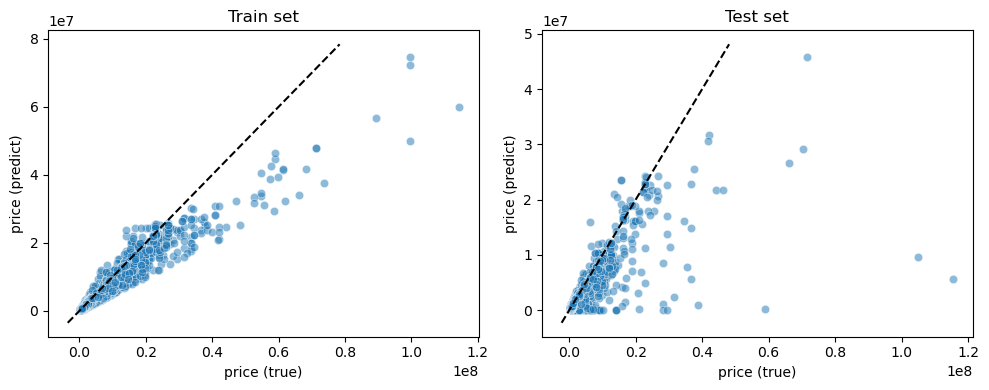

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(
    x=y_train_rbf.ravel(),
    y=y_hat_train_rbf,
    ax=ax[0],
    alpha=0.5,
)

sns.scatterplot(
    x=y_test_rbf.ravel(),
    y=y_hat_test_rbf,
    ax=ax[1],
    alpha=0.5,
)

for a in ax:
    a.set_xlabel(f'{outputs} (true)')
    a.set_ylabel(f'{outputs} (predict)')
    a.plot(a.get_ylim(), a.get_ylim(), ls='--', c='k')

ax[0].set_title('Train set')
ax[1].set_title('Test set')

fig.tight_layout()

## 1.6. Model performance
* linear regression models show a similar large RMSE metric and from comparasion plot of precited price and groud-truth price, we can see linear models can basically catch price change directions but not very precisely.

# 2. Light Gradient Boosting Machine (LightGBM) Model

Light Gradient Boosting Machine (LightGBM) is a distributed gradient boosting (Gradient Boosting Decision Tree, GBDT) framework based on decision tree algorithm. In the data environment of large training samples and high-dimensional features, compared with GBDT, LightGBM has faster training speed and efficiency, lower memory usage, better accuracy, supports parallel learning and can process large-scale data.

In [8]:
df_train = pd.read_csv(train_data_file)
df_test = pd.read_csv(test_data_file)

# df_train = df_train.drop(['pa_ang_mo_kio', 'pa_bedok', 'pa_bishan', 
#                        'pa_boon_lay', 'pa_bukit_batok', 'pa_bukit_merah', 
#                        'pa_bukit_panjang', 'pa_bukit_timah', 'pa_central_water_catchment', 
#                        'pa_changi', 'pa_changi_bay', 'pa_choa_chu_kang', 'pa_clementi', 
#                        'pa_downtown_core', 'pa_geylang', 'pa_hougang', 'pa_jurong_east', 
#                        'pa_jurong_west', 'pa_kallang', 'pa_lim_chu_kang', 'pa_mandai', 
#                        'pa_marina_south', 'pa_marine_parade', 'pa_museum', 'pa_newton', 
#                        'pa_north-eastern_islands', 'pa_novena', 'pa_orchard', 'pa_outram', 
#                        'pa_pasir_ris', 'pa_paya_lebar', 'pa_pioneer', 'pa_punggol', 
#                        'pa_queenstown', 'pa_river_valley', 'pa_rochor', 'pa_seletar', 
#                        'pa_sembawang', 'pa_sengkang', 'pa_serangoon', 'pa_simpang', 
#                        'pa_singapore_river', 'pa_southern_islands', 'pa_straits_view', 
#                        'pa_sungei_kadut', 'pa_tampines', 'pa_tanglin', 'pa_tengah', 
#                        'pa_toa_payoh', 'pa_tuas', 'pa_western_islands', 
#                        'pa_western_water_catchment', 'pa_woodlands', 'pa_yishun', 
#                        'pt_apartment', 'pt_bungalow', 'pt_cluster_house', 
#                        'pt_condo', 'pt_conservation_house', 'pt_corner_terrace', 
#                        'pt_executive_condo', 'pt_good_class_bungalow', 'pt_hdb', 
#                        'pt_land_only', 'pt_landed', 'pt_semi-detached_house', 
#                        'pt_shophouse', 'pt_terraced_house', 'pt_townhouse', 'pt_walk-up'], axis=1)


# df_test = df_test.drop(['pa_ang_mo_kio', 'pa_bedok', 'pa_bishan', 
#                        'pa_boon_lay', 'pa_bukit_batok', 'pa_bukit_merah', 
#                        'pa_bukit_panjang', 'pa_bukit_timah', 'pa_central_water_catchment', 
#                        'pa_changi', 'pa_changi_bay', 'pa_choa_chu_kang', 'pa_clementi', 
#                        'pa_downtown_core', 'pa_geylang', 'pa_hougang', 'pa_jurong_east', 
#                        'pa_jurong_west', 'pa_kallang', 'pa_lim_chu_kang', 'pa_mandai', 
#                        'pa_marina_south', 'pa_marine_parade', 'pa_museum', 'pa_newton', 
#                        'pa_north-eastern_islands', 'pa_novena', 'pa_orchard', 'pa_outram', 
#                        'pa_pasir_ris', 'pa_paya_lebar', 'pa_pioneer', 'pa_punggol', 
#                        'pa_queenstown', 'pa_river_valley', 'pa_rochor', 'pa_seletar', 
#                        'pa_sembawang', 'pa_sengkang', 'pa_serangoon', 'pa_simpang', 
#                        'pa_singapore_river', 'pa_southern_islands', 'pa_straits_view', 
#                        'pa_sungei_kadut', 'pa_tampines', 'pa_tanglin', 'pa_tengah', 
#                        'pa_toa_payoh', 'pa_tuas', 'pa_western_islands', 
#                        'pa_western_water_catchment', 'pa_woodlands', 'pa_yishun', 
#                        'pt_apartment', 'pt_bungalow', 'pt_cluster_house', 
#                        'pt_condo', 'pt_conservation_house', 'pt_corner_terrace', 
#                        'pt_executive_condo', 'pt_good_class_bungalow', 'pt_hdb', 
#                        'pt_land_only', 'pt_landed', 'pt_semi-detached_house', 
#                        'pt_shophouse', 'pt_terraced_house', 'pt_townhouse', 'pt_walk-up'], axis=1)

In [10]:
df_train_8, df_test_2 = train_test_split(df_train, test_size = 0.2, random_state = 42)

### train Light Gradient Boosting Machine (LightGBM) Model

### 2.1. Histogram algorithm

LightGBM uses a histogram-based algorithm to discretize continuous eigenvalues into K integers, construct a histogram with a width of K, traverse the training data, and count the cumulative statistics of each discrete value in the histogram. When selecting the split points of a feature, it is only necessary to traverse the discrete values of the sorted histogram. 

The use of the histogram algorithm reduces the computational cost of the algorithm. The pre-sort adopted by XGBoost needs to traverse each eigenvalue and calculate the split gain, while the histogram algorithm only needs to calculate K times, which improves the efficiency of finding split points; reduces the memory of the algorithm Consumption, it is not necessary to store the pre-sorted results, only the discretized values of the features need to be saved. 

Because the decision tree itself is a weak learner, the use of the histogram to discretize the eigenvalues can have a regularization effect, and the discretized split points can improve the generalization ability of the algorithm.

### 2.2. Leaf-wise algorithm

Most decision tree learning algorithms use a level-wise strategy for tree generation. The difference is that LightGBM adopts a more efficient leaf-wise strategy.

The strategy finds a leaf node with the largest splitting gain from all the leaf nodes of the current decision tree each time, and then splits it, and so on. Such a mechanism reduces the split calculation of leaf nodes with lower gains and reduces a lot of unnecessary overhead.

Compared with the level-wise strategy, leaf-wise can reduce the error and get better accuracy with the same number of splits. The disadvantage of the leaf-wise algorithm is that it may generate deeper decision trees. Therefore, LightGBM adds parameters that limit the maximum depth to leaf-wise, which prevents overfitting while ensuring the efficiency of the algorithm.



In [11]:
all_X_att_train = df_train_8.columns.to_list()
all_X_att_train.remove('price')
X_train, X_test, y_train, y_test = df_train_8[all_X_att_train], df_test_2[all_X_att_train], df_train_8['price'], df_test_2['price']
### train RBF model with standardized data

In [12]:
estimator = LGBMRegressor(objective='regression', learning_rate=0.1, metric='rmse', 
                          min_child_weight=0.001, colsample_bytree=0.9)

- boosting: default=gbdt, type=enum, options=gbdt, rf, dart, goss, alias=boost, boosting_type

gbdt, traditional gradient boosted decision tree

rf, Random Forest

dart, Dropouts meet Multiple Additive Regression Trees

goss, Gradient-based One-Side Sampling

- objective, default=regression, type=enum, options=regression, regression_l1, huber, fair, poisson, quantile, quantile_l2, binary, multiclass, multiclassova, xentropy, xentlambda, lambdarank, alias=objective, app , application

regression application

regression_l2, L2 loss, alias=regression, mean_squared_error, mse

regression_l1, L1 loss, alias=mean_absolute_error, mae

huber, huber loss

fair, fair loss

poisson, Poisson regression

quantile, Quantile regression

quantile_l2, similar to quantile, but uses L2 loss

- learning_rate, default=0.1, type=double, alias=shrinkage_rate

In dart, shrinkage rate also affects the normalized weight of dropped trees

- metric, default={l2 for regression}, {binary_logloss for binary classification}, {ndcg for lambdarank}, type=multi-enum, options=l1, l2, ndcg, auc, binary_logloss, binary_error …

l1, absolute loss, alias=mean_absolute_error, mae

l2, square loss, alias=mean_squared_error, mse

l2_root, root square loss, alias=root_mean_squared_error, rmse

quantile, Quantile regression

huber, huber loss

fair, fair loss

poisson, Poisson regression

ndcg, NDCG

map, MAP

auc, AUC

binary_logloss, log loss

In [13]:
param_grid = {
    'max_depth':[4, 5, 6],
    'num_leaves':[25, 30, 40],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators':[100, 150, 200],
    'min_child_samples': [5, 10, 15],
    'subsample': [0.9, 1.0]
}

- max_depth, default=-1, type=int

Limit the maximum depth of the tree model. This prevents overfitting when #data is small. The tree can still grow leaf-wise.

&lt; 0 means no limit.

- num_leaves, default=31, type=int, alias=num_leaf

number of leaves on a tree

- min_data_in_leaf, default=20, type=int, alias=min_data_per_leaf , min_data, min_child_samples

The minimum amount of data on a leaf. 

Can be used to deal with overfitting.

- bagging_fraction, default=1.0, type=double, 0.0 &lt; bagging_fraction &lt; 1.0, alias=sub_row, subsample

Similar to feature_fraction, but it will randomly select parts of the data without resampling

Can be used to speed up training

Can be used to deal with overfitting

Note: In order to enable bagging, bagging_freq should be set to a non-zero value

In [14]:
lightGBM_model = GridSearchCV(estimator, param_grid, cv=5, scoring='neg_mean_squared_error')
lightGBM_model.fit(X_train, y_train)

joblib.dump(lightGBM_model, 'gbm_model.pkl')
print('Best parameters found by grid search are:', lightGBM_model.best_params_)

Best parameters found by grid search are: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_samples': 5, 'n_estimators': 200, 'num_leaves': 30, 'subsample': 0.9}


- estimator

Choose the classifier to use, and pass in parameters other than the ones that need to be determined optimal. Each classifier requires a scoring parameter, or score method.

- param_grid

The value of the parameter to be optimized, the value is a dictionary or a list

- verbose=0, scoring=None

verbose: log verbosity, int: verbosity, 0: do not output the training process, 1: occasionally output, > 1: output for each sub-model.

### evaluate Light Gradient Boosting Machine (LightGBM) Model

In [15]:
y_hat_train = lightGBM_model.predict(X_train)
y_hat_test = lightGBM_model.predict(X_test)

In [16]:
# calculate MAE, MSE, RMSE for train_data
print('train_MAE: ', metrics.mean_absolute_error(y_hat_train, y_train))
print('train_MSE: ', metrics.mean_squared_error(y_hat_train, y_train))
print('train_RMSE: ', metrics.mean_squared_error(y_hat_train, y_train)**(1/2))

# calculate MAE, MSE, RMSE for test_data
print('test_MAE: ', metrics.mean_absolute_error(y_hat_test, y_test))
print('test_MSE: ', metrics.mean_squared_error(y_hat_test, y_test))
print('test_RMSE: ', np.sqrt(metrics.mean_squared_error(y_hat_test, y_test)))


train_MAE:  279262.6835464703
train_MSE:  605990924253.9988
train_RMSE:  778454.1889244342
test_MAE:  398522.81770723127
test_MSE:  5463241789927.01
test_RMSE:  2337357.865181755


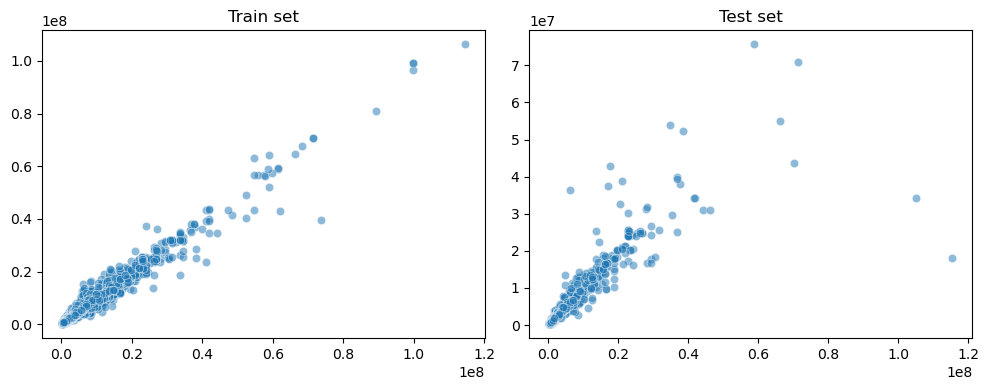

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(
    x=y_train.ravel(),
    y=y_hat_train,
    ax=ax[0],
    alpha=0.5,
)
sns.scatterplot(
    x=y_test.ravel(),
    y=y_hat_test,
    ax=ax[1],
    alpha=0.5,
)

ax[0].set_title('Train set')
ax[1].set_title('Test set')

fig.tight_layout()

# 3. Random Forest Model

### train Random Forest Model

In [18]:
df_train_8, df_test_2 = train_test_split(df_train, test_size = 0.2, random_state = 42)

all_X_att_train = df_train_8.columns.to_list()
all_X_att_train.remove('price')
X_train, X_test, y_train, y_test = df_train_8[all_X_att_train], df_test_2[all_X_att_train], df_train_8['price'], df_test_2['price']


In [20]:
RF_estimator = RandomForestRegressor()
param_grid = {
    'n_estimators': [70, 80, 90],
    'max_depth': [24, 26],
    'min_samples_leaf' : [4, 5],
    'min_samples_split' : [4, 5],
}
rf = GridSearchCV(RF_estimator, param_grid, cv=5)
rf.fit(X_train, y_train)

joblib.dump(rf.best_estimator_, 'rf_model.pkl')

print('Best parameters found by grid search are:', rf.best_params_)
## Result: Best parameters found by grid search are: {'max_depth': 16, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 60}

Best parameters found by grid search are: {'max_depth': 26, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 90}


### evaluate Random Forest Model

In [21]:
y_hat_train = rf.predict(X_train)
y_hat_test = rf.predict(X_test)

In [23]:
# calculate MAE, MSE, RMSE for train_data
print('train_MAE: ', metrics.mean_absolute_error(y_hat_train, y_train))
print('train_MSE: ', metrics.mean_squared_error(y_hat_train, y_train))
print('train_RMSE: ', metrics.mean_squared_error(y_hat_train, y_train)**(1/2))

# calculate MAE, MSE, RMSE for test_data
print('test_MAE: ', metrics.mean_absolute_error(y_hat_test, y_test))
print('test_MSE: ', metrics.mean_squared_error(y_hat_test, y_test))
print('test_RMSE: ', np.sqrt(metrics.mean_squared_error(y_hat_test, y_test)))

train_MAE:  223327.63558523217
train_MSE:  1390560165169.3691
train_RMSE:  1179220.1512734462
test_MAE:  351684.7968653278
test_MSE:  5709762238112.625
test_RMSE:  2389510.878425253


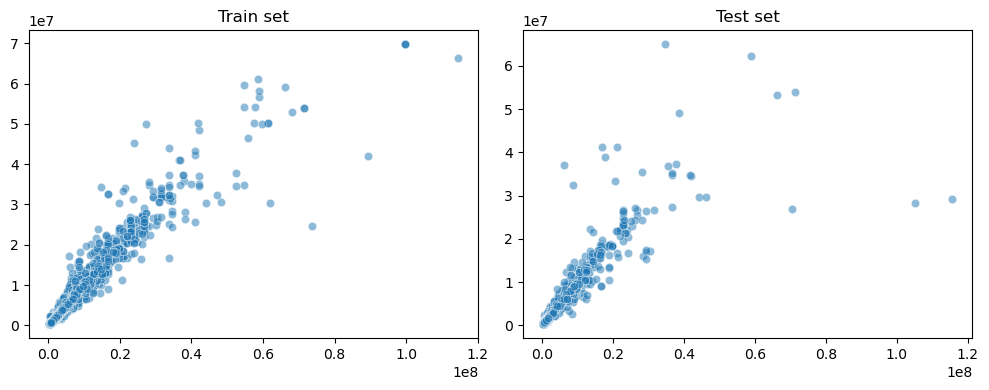

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(
    x=y_train.ravel(),
    y=y_hat_train,
    ax=ax[0],
    alpha=0.5,
)

sns.scatterplot(
    x=y_test.ravel(),
    y=y_hat_test,
    ax=ax[1],
    alpha=0.5,
)

ax[0].set_title('Train set')
ax[1].set_title('Test set')

fig.tight_layout()